# 17 有监督学习 - 线性<font color="red">回归</font>预测 `Boston` 房价

## 17.1 引言

### 17.1.1 分类问题回顾


- 回顾分类识别 —— 预测目标属于离散集合，如
    - 鸢尾花 3 分类预测
    - Titanic 号乘客生还或遇难 2 分类预测
    - 人脸识别 40 人分类，戴眼镜判断 2 分类
    - 新闻组识别 20 分类


- 回归问题 —— 无限连续分类问题，特点是
    - 非离散分类
    - 目标值在连续区间上分布
    - 目标是特征的（非离散）函数


- 本讲重点
    - 线性回归 —— 简单的回归模型

### 17.1.2 导入模块

In [1]:
%pylab inline

import IPython
import sklearn as sk

import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print ('IPython version:', IPython.__version__)
print ('pandas version:', pd.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 7.8.0
pandas version: 0.25.1
numpy version: 1.16.5
scikit-learn version: 0.24.1
matplotlib version: 3.1.1


## 17.2 简介 —— 机器学习中的线性回归


- 机器学习中的线性回归 —— 来自于统计分析

### 17.2.1 一元线性回归


- 给定数据集
$$D=\{(x_1; y_1), (x_2; y_2),\cdots \}$$


- 试图学习此数据集，得到一个线性模型
    $$\hat{y} = b + wx$$


- 使该模型尽可能准确的反映 $x_i$ 和 $y_i$ 的关系


- 一元线性回归问题归结为求参数 $b, w$，使
$$J=\sum_\limits{i=1}^n{\left[y_i-\hat{y}_i\right]^2}=\sum_\limits{i=1}^n{\left[y_i-(b+wx_i)\right]^2}$$
取最小值


- 回归后的系数可通过回归器的如下参数属性获得
    - `coef_` —— $w$
    - `intercept_` —— $b$

### 17.2.2 多元线性回归


- 给定数据集
$$D=\{(x^{(1)}_1, x^{(1)}_2,\cdots, x^{(1)}_n; y_1), (x^{(2)}_1, x^{(2)}_2,\cdots, x^{(2)}_n; y_2),\cdots,  (x^{(m)}_1, x^{(m)}_2,\cdots, x^{(m)}_n; y_m) \}$$


- 试图学习此数据集，得到一个线性模型
    $$\hat{y} = b + w_1x_1 + w_2x_2 + \cdots + w_nx_n$$
    或
    $$\hat{y} = b + \rm{W}^T\mathbf{x}$$
    其中
    $$\rm{W} = (w_1, w_2, \cdots, w_n)^T$$
    $$\rm{x} = (x_1, x_2, \cdots, x_n)^T$$


- 使该模型尽可能准确的反映 $\mathbf{x}^{(i)}=(x^{(i)}_1, x^{(i)}_2,\cdots, x^{(i)}_n)$ 和 $y_i$ 的关系


- 多元线性回归问题归结为求参数 $b, w_1, w_2, \cdots, w_n$，使
$$
J=\sum_\limits{i=1}^m{\left[y_i-\hat{y}_i\right]^2}=\sum_\limits{i=1}^m{\left[y_i-(b+\rm{W}^T\mathbf{x}^{(i)})\right]^2}
=\sum_\limits{i=1}^m{\left[y_i-(b + w_1x^{(i)}_1 + w_2x^{(i)}_2 + \cdots + w_nx^{(i)}_n)\right]^2}
$$
取最小值


- 回归后的系数（向量）可通过回归器的如下参数属性获得
    - `coef_` —— $w_1, w_2, \cdots, w_n$
    - `intercept_` —— $b$

### 17.2.3 多项式线性回归

#### (1) 一元 $n$ 次多项式回归


- 构建模型
$$\hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_nx^n$$

#### (2) 二元 2 次多项式回归


- 构建模型
$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_1x_2 + w_5x_2^2$$

#### (3) 多项式回归的优缺点


- 优点 —— 可以通过增加 $x$ 的高次项对实测点进行逼近，直至满意为止
- 缺点 —— 随着自变量数量的增加，多元多项式回归分析的计算量急剧增加

#### (4) 注意


- 多元多项式回归<font color="red"> 本质上不是 多元线性回归</font>
    - 某特征的不同幂次并不是相互独立的
    - 当参数在小区间内变化时，可以近似当成多元线性回归   

#### (5) 优化问题


- 线性回归问题 —— 本质上都可化为优化问题求解


- 常用方法
    - 驻值解法
    - Lagrange 乘子法
    - 最小二乘法
    - 动态规划方法
    - 梯度下降法，及其变异：批量梯度下降、随机梯度下降、共轭梯度下降

### 17.2.4 梯度下降法

#### (1) 基本原理


- 多元函数 $f(\mathbf{x}) = f(x_1,x_2,\cdots,x_n)$ 定义在空间 $\rm{R}^n$ 中


- 梯度定义
$$\nabla f = \left(\dfrac{\partial f}{\partial x_1}, \dfrac{\partial f}{\partial x_2}, \cdots, \dfrac{\partial f}{\partial x_n}\right)$$


- 方向导数
    $$
    \dfrac{\partial f}{\partial\mathbf{l}}=
    \sum_\limits{i=1}^n{l_i\dfrac{\partial f}{\partial x_i}}=\mathbf{l}\cdot\nabla f
    $$
    这里，$\mathbf{l}=(l_1, l_2, \cdots, l_n)$ 为单位方向矢量
    

- 利用柯西不等式
    $$
    \left|\dfrac{\partial f}{\partial\mathbf{l}}\right|\le \|\mathbf{l}\|_2\times\|\nabla f\|_2
    = \|\nabla f\|_2
    =\sqrt{\left(\dfrac{\partial f}{\partial x_1}\right)^2+\left(\dfrac{\partial f}{\partial x_2}\right)^2
    +\cdots+\left(\dfrac{\partial f}{\partial x_n}\right)^2}
    $$
    其中，等式成立等价于 $\mathbf{l}$ 和 $\nabla f$ 平行


- 梯度定理
    - 当方向矢量 $\mathbf{l}$ 与梯度 $\nabla f$ 同方向时，即 $\mathbf{l} = \dfrac{\nabla f}{\|\nabla f\|_2}$ 时，方向导数取得最大值 $\|\nabla f\|_2$
    
    - 而当方向矢量 $\mathbf{l}$ 与梯度 $\nabla f$ 反方向时，即 $\mathbf{l} = -\dfrac{\nabla f}{\|\nabla f\|_2}$ 时，方向导数取得最小值 $-\|\nabla f\|_2$ 
    
    
- 简言之
    - 沿梯度方向，函数值 $f(\mathbf{x})$ 增加最快
    - <font color="red">逆梯度方向，函数值 $f(\mathbf{x})$ 减少最快</font>

#### (2) 梯度下降法的计算步骤

<div style="width:900px;">
    <div style="float:right; clear: both;" align="center">
    <img src="images\800px-Gradient_descent.svg.png" width="360" alt="" hspace="20">
         梯度下降法计算步骤示意图（取自<a href="https://en.wikipedia.org/wiki/Gradient_descent">维基百科</a>）
    </div>


- 示意图
    - 函数 $f(\mathbf{x})$ 的等高线图
    - 中心点是最小值点
    - 逼近过程


- 优化问题 —— 寻找点坐标 $\mathbf{x^*}=(x^*_1, x^*_2, \cdots, x^*_n)$，以使


$$f(\mathbf{x^*})=\min_{\mathbf{x}} f(\mathbf{x})$$


- 给出试探解 $\mathbf{x_{0}}=(x_{01}, x_{02}, \cdots, x_{0n})$


- 由梯度定理，沿着梯度下降方向，逐步逼近


$$
\mathbf{x}_{k+1} = \mathbf{x}_{k}-\alpha_k\nabla f(\mathbf{x}_{k}),\quad k=0,1,2,\cdots
$$


- 其中
    - $\mathbf{x_{0}}=(x_{01}, x_{02}, \cdots, x_{0n})$ 是起始点
    - $\alpha_k$ 是第 $k$ 步的学习率(learning rate)，控制收敛速度


- 参数 $\alpha_k$ 的注意事项
    - 取正值，指向下降的方向
    - 取太大，有可能不稳定
    - 取太小，有可能收敛慢
</div>

## 17.3 `Boston` 房价数据集 (Boston House Pricing Dataset)


- `Boston`
    - 美国 `Massachusetts` 州的首府和最大城市，位于东北部大西洋沿岸
    - 上世纪 70～80 年代，曾面临严重污染

### 17.3.1 数据集的产生


- 美国人口调查局 (United States Census Bureau) 最早于1978年收集
    - 包含麻省波士顿市住房价格的有关信息
    - 数据集有506个案例

### 17.3.2 数据集引起重视 —— 用于环境经济研究


- 1978 年的一篇论文，采用了 `Boston` 房价数据集进行分析
    - 关注重点
        - 空气质量下降对人类健康、农作物生长、材料退变、财富贬值等的影响
        - 人们买房愿意为清洁空气付钱吗？
    - 资助机构 —— 美国国家经济研究局 (NBER, National Bureau of Economics Research) 


- 论文信息 ([访问链接](https://www.sciencedirect.com/science/article/abs/pii/0095069678900062))
    - 作者 —— David Harrison Jr. 和 Daniel L Rubinfeld
    - 标题 —— Hedonic prices and the demand for clean air
    - 期刊 —— Journal of Environmental Economics and Management, Volume 5, Issue 1, March 1978, Pages 81-102

### 17.3.3 数据集受到持续关注


- 成为案例
    - 大量研究、分析、算法使用它的数据
    
    
- 成为基准 (benchmark)


- 得到修正 —— Gilley, O.W., and R. Kelley Pace
    - 更正部分错误
    - 引入经度纬度

### 17.3.4 数据源


- [http://lib.stat.cmu.edu/datasets/](http://lib.stat.cmu.edu/datasets/)
- [http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
- [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

## 17.4 准备数据

### 17.4.1 导入 —— 波士顿房价数据集


- 语法
```python
>>> sklearn.datasets.load_boston(return_X_y=False)
```


- 功能 —— 加载返回波士顿房价数据集


- 参数
    - return_X_y 布尔型，缺省='False'
        - 如果 `True`，返回 `(data, target)`
        - 如果 `False` 返回 `data` 类字典成批数据

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

### 17.4.2 查看数据

In [3]:
# 数据总览
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# 数据描述
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# 特征名称
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# 数据维度
print ("boston.data 的维度 = {}".format(boston.data.shape))

boston.data 的维度 = (506, 13)


In [7]:
# 简单统计目标值 最大、最小、平均
print ("max  = {0}\nmin  = {1}\nmean = {2:<10.4f}".format(np.max(boston.target), np.min(boston.target), np.mean(boston.target)))

max  = 50.0
min  = 5.0
mean = 22.5328   


### 17.4.3 抽取首条数据

In [8]:
print ("boston.data[0] =\n{}\n".format(boston.data[0]))

boston.data[0] =
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]



### 17.4.4 特征数据统计分析

In [9]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
print("target mean: {}".format(boston.target.mean()))
print("target min : {}".format(boston.target.min()))
print("target max : {}".format(boston.target.max()))
print("target std : {}".format(boston.target.std()))
print("target var : {}".format(boston.target.var()))

target mean: 22.532806324110677
target min : 5.0
target max : 50.0
target std : 9.188011545278203
target var : 84.41955615616556


## 17.5 数据分析


- 采用若干种回归方法
- 比较效果
- 预测房价 —— 属性特征的函数

### 17.5.1 建立训练和测试集

- 使用函数 `train_test_split`

In [12]:
#from sklearn.cross_validation import train_test_split # 适用低版本
from sklearn.model_selection import train_test_split

In [13]:
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, 
    boston.target,
    test_size=0.25,
    random_state=33)

In [59]:
# 查看维度
print("X_train.shape = {0}    X_test .shape = {1}\ny_train.shape = {2}       y_test .shape = {3}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
y_test

X_train.shape = (379, 13)    X_test .shape = (127, 13)
y_train.shape = (379,)       y_test .shape = (127,)


array([-0.26118403, -1.86681472, -1.02628322, -1.11249158, -0.18575172,
       -0.34739239,  1.02116531, -0.87541859,  1.08582158, -0.16419963,
        0.77331628,  1.40910292, -1.56508546, -0.14264754, -0.71377792,
        0.00821709, -0.86464254, -0.9508509 ,  0.88107672, -1.18792389,
       -1.10171553,  0.53624329, -0.2288559 , -0.35816844,  0.97806113,
       -0.1103194 ,  0.02976918,  0.09442545, -1.30646038,  1.29056643,
       -0.41204866,  0.38537866, -1.33878852, -0.58446538,  0.11597754,
        1.41987897,  0.25606612, -0.98317904,  0.49313911,  0.18063381,
       -1.10171553, -1.44654897,  1.05349344, -0.98317904,  0.06209731,
       -0.56291329, -0.78921023, -0.04566313,  0.35305053, -0.25040799,
       -0.9508509 ,  1.11814971, -0.83231441, -0.86464254, -0.14264754,
       -0.61679351,  0.01899313, -1.20947598, -0.25040799, -0.07799127,
        0.01899313, -0.48748097,  2.24963442, -0.19652776, -0.86464254,
        0.62245165,  0.04054522, -0.98317904, -0.34739239,  0.81

### 17.5.2 数据标准化


数据标准化即是对数据进行以下线性变换

$$
\hat{d_i}=\dfrac{d_i-\bar{d}}{\sigma}
$$

其中，$\bar{d}$ 为均值，$\sigma$ 为标准差

#### Numpy 数组维度重构参数取 -1 的说明


- 参数中的 -1 由系统自动计算应该是多少维度
```python
>>> a.reshape(-1,1)
>>> a.reshape(1,-1)
```

- 例
```python
>>> z = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])
>>> print(z.shape) # 将输出 3 行 4 列
>>> z = z.reshape(-1,3)
>>> print(z.shape) # 将输出 4 列 3 行
```

#### (1) 维度重构示例


- 注意参数 -1 的作用

In [15]:
z = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])
print(z.shape)
print(z)

(3, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [16]:
z = z.reshape(-1,3) # 注意 -1 的作用
print(z.shape)
print(z)

(4, 3)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


#### (2) 数据集标准化操作

In [17]:
# 导入标准化器
from sklearn.preprocessing import StandardScaler

In [61]:
# 转换为二维数组，冗余，但不得不做
y_train = y_train.reshape(-1,1) # 1 列
y_test  = y_test.reshape(-1,1)  # 1 列

In [19]:
# 拟合
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)

In [20]:
# 对 X_train、y_train 标准化
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)

In [21]:
# 对 X_test、y_test 标准化
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [62]:
# 转为一维数组
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)

array([-0.26118403, -1.86681472, -1.02628322, -1.11249158, -0.18575172,
       -0.34739239,  1.02116531, -0.87541859,  1.08582158, -0.16419963,
        0.77331628,  1.40910292, -1.56508546, -0.14264754, -0.71377792,
        0.00821709, -0.86464254, -0.9508509 ,  0.88107672, -1.18792389,
       -1.10171553,  0.53624329, -0.2288559 , -0.35816844,  0.97806113,
       -0.1103194 ,  0.02976918,  0.09442545, -1.30646038,  1.29056643,
       -0.41204866,  0.38537866, -1.33878852, -0.58446538,  0.11597754,
        1.41987897,  0.25606612, -0.98317904,  0.49313911,  0.18063381,
       -1.10171553, -1.44654897,  1.05349344, -0.98317904,  0.06209731,
       -0.56291329, -0.78921023, -0.04566313,  0.35305053, -0.25040799,
       -0.9508509 ,  1.11814971, -0.83231441, -0.86464254, -0.14264754,
       -0.61679351,  0.01899313, -1.20947598, -0.25040799, -0.07799127,
        0.01899313, -0.48748097,  2.24963442, -0.19652776, -0.86464254,
        0.62245165,  0.04054522, -0.98317904, -0.34739239,  0.81

### 17.5.3 回归问题分析效果的评价

#### (1)  经验或预见


- 对于回归问题
    - `Accuracy` 不是好的评价指标，因为不再是离散分类，而是实数预测
    - 几乎不能绝对精确的预测目标值


- 例如
    - target = 1.23456, predict=1.23457，预测是否准确？
        - 对于分类 —— `False`
        - 对于回归 —— `True`


- 回归分析效果评价要另寻途径
    - 拟合优度（最常用的方法） —— `R2` 决定系数

#### (2) `R2` 决定系数 (coefficient of determination) —— 缺省的(拟合优度)评分方法



- 拟合优度（goodness of fit）是指回归直线对观测值的拟合程度评分方法


- 假设一数据集包括 $\{y_1, y_2, \cdots, y_n\}$ 共 $n$ 个观察值，相对应的模型预测值分别为 $\{\hat{y}_1, \hat{y}_2, \cdots, \hat{y}_n\}$


- 定义 —— 取自 [维基百科: Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
    - 残差 (the residuals) $$e_i=y_i-\hat{y}_i, \quad (i=1,2,\cdots, n)$$
    - 平均观察值 (the mean of the observed data) $$\bar{y} = \dfrac{1}{n}\sum_\limits{i=1}^n{y_i}$$
    - 总离差平方和 (the total sum of squares, 与方差成正比) $$SS_{tot}=\sum_\limits{i=1}^n{\left(y_i-\bar{y}\right)^2}$$
    - 回归平方和 (the regression sum of squares, also called the explained sum of squares) $$SS_{reg}=\sum_\limits{i=1}^n{\left(\hat{y}_i-\bar{y}\right)^2}$$
    - 残差平方和 (the sum of squares of residuals, also called the residual sum of squares) $$SS_{res}=\sum_\limits{i=1}^n{\left(y_i-\hat{y}_i\right)^2}=\sum_\limits{i=1}^n{e_i^2}$$


- 决定系数 $R_2$ 定义为
$$
R_2(y,\hat{y})=1-\dfrac{\sum_\limits{i=1}^{n}\left(y_i-\hat{y}_i\right)^2}{\sum_\limits{i=1}^{n}\left(y_i-\bar{y}\right)^2}
= 1-\dfrac{SS_{res}}{SS_{tot}}
= \dfrac{SS_{reg}}{SS_{tot}}
$$

- 注意
    - $n$ 是样本数量
    - 指标越好，越接近 1
    - 指标越差，越远离 1
    - 指标为 0，每个预测值都为均值
    - 指标为负，纯属瞎猜，还不如每个预测值取均值

#### (3) 使用 R2的示例

In [23]:
from sklearn.metrics import r2_score

In [24]:
# 例 r2_score 评价方法

y_true     = [1,      2,     6]

y_good     = [ 1.1,   1.92,  5.95]
y_not_good = [ 3.0,   3.02,  3.1]   # 预测接近均值
y_bad      = [-0.8,   1.01,  0.2]

print("r2_score(y_true, y_good    ) = {0}\nr2_score(y_true, y_not_good) = {1}\nr2_score(y_true, y_bad     ) = {2}".
      format(r2_score(y_true, y_good), r2_score(y_true, y_not_good), r2_score(y_true, y_bad)))

r2_score(y_true, y_good    ) = 0.99865
r2_score(y_true, y_not_good) = 0.03925714285714288
r2_score(y_true, y_bad     ) = -1.7042928571428573


#### (4) 定义 `train_and_evaluate` 函数


- 功能 —— 利用 K-折 进行交叉验证


- 调用语法
```python
>>> train_and_evaluate(regr, X_train, y_train)
```


- 参数
    - `regr` 回归器
    - `X_train` 训练特征
    - `y_train` 训练目标

In [25]:
from sklearn.model_selection import cross_val_score, KFold

In [26]:
def train_and_evaluate(regr, X_train, y_train):
    regr.fit(X_train, y_train)  # 训练

    print ("在训练集上，决定系数：", regr.score(X_train, y_train))

    # 创建 K-折
    cv = KFold(5, shuffle=True, random_state=33)                     # model_selection 模块用
    #cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)  # cross_validation 模块用

    scores = cross_val_score(regr, X_train, y_train, cv=cv)
    print ("使用 K-折交叉验证的 平均决定系数:",np.mean(scores))

### 17.5.4 明确任务 —— 建立线性回归模型


- 拟合 14 维超空间中的超平面
    - 达到所给数据点（14维：特征 + 目标）的最佳逼近效果
    - 如何实现最佳逼近？
        - 选择最小二乘法


- 对于新特征数据
    - 利用超平面方程，计算并返回预测目标值

#### (1) 随机梯度下降回归器 —— SGDRegressor


- 调用语法
```python
>>> linear_model.SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, 
                              fit_intercept=True, max_iter=None, tol=None, shuffle=True,
                              verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling',
                              eta0=0.01, power_t=0.25, warm_start=False, average=False, n_iter=None)
```


- 功能 —— 创建随机梯度下降回归器 (Stochastic Gradient Descent Regressor)


- 参数
    - `loss` 使用的损失函数，缺省 `squared_loss`
    - `penalty` 惩罚方法，缺省是 `l2`
    - `alpha` 正则项系数，缺省值是 `0.0001`，对于优化问题，即是学习率（learning rate）
    - `max_iter` 可选整数，最大迭代数
    - 余略

In [27]:
from sklearn import linear_model

In [28]:
regr_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None, max_iter=5, tol=None, random_state=42)

In [29]:
train_and_evaluate(regr_sgd, X_train, y_train)

在训练集上，决定系数： 0.743772396920508
使用 K-折交叉验证的 平均决定系数: 0.7110851553432516


#### (2) 训练集预测值可视化


- 功能 —— 观察值-预测值 散点图


- 语法
```python
>>> visualization_for_predict_data(data_observed, data_predicted, label_observed, label_predicted)
```


- 参数
    - `data_observed` 观察值
    - `data_predicted` 预测值
    - `label_observed` 观察值标签
    - `label_predicted` 预测值标签

In [30]:
def visualization_for_predict_data(data_observed, data_predicted, label_observed, label_predicted):
    plt.scatter(data_observed, data_predicted)

    max_v = np.max([data_predicted] + [data_observed]) * 1.1
    min_v = np.min([data_predicted] + [data_observed]) * 1.1

    plt.plot([min_v,max_v], [min_v,max_v], "r-")

    plt.xlabel(label_observed)
    plt.ylabel(label_predicted)

In [31]:
y_pred = regr_sgd.predict(X_train)

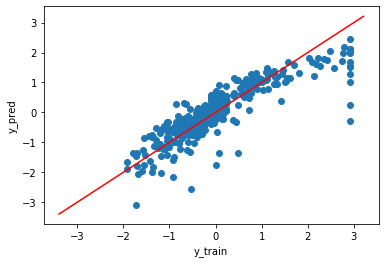

In [32]:
visualization_for_predict_data(y_train, y_pred, "y_train", "y_pred")

#### (3) 超平面方程系数


- `regr_sgd.coef_`
- `regr_sgd.intercept_`

In [33]:
print("regr_sgd.coef_ =\n{}\n".format(regr_sgd.coef_))
print("regr_sgd.intercept_ = {}".format(regr_sgd.intercept_))

regr_sgd.coef_ =
[-0.0870378   0.06716774 -0.05044662  0.10863786 -0.07723512  0.38993333
 -0.02487267 -0.20993855  0.08553381 -0.05464621 -0.1983905   0.06011348
 -0.3776057 ]

regr_sgd.intercept_ = [0.00227159]


#### (4) 改进 `penalty` 参数

- 注意到
    - 参数 `penalty = None`
    - 使用 `penalty` 参数有助于避免过拟合


- 对上述结果不满意
    - 取 `penalty` 参数为 `l2`

In [34]:
regr_sgd_l2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', max_iter=5, tol=None, random_state=42)

In [58]:
print("regr_sgd_l2 = {}\n".format(regr_sgd_l2))

print("regr_sgd = {}\n".format(regr_sgd))

regr_sgd_l2 = SGDRegressor(max_iter=5, random_state=42, tol=None)

regr_sgd = SGDRegressor(max_iter=5, penalty=None, random_state=42, tol=None)



In [36]:
train_and_evaluate(regr_sgd_l2, X_train, y_train)

在训练集上，决定系数： 0.743771399125549
使用 K-折交叉验证的 平均决定系数: 0.7110873261957128


#### (5) 训练集预测值可视化

In [37]:
y_pred = regr_sgd_l2.predict(X_train)

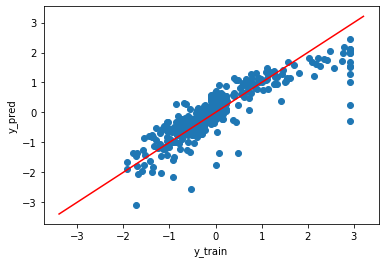

In [38]:
visualization_for_predict_data(y_train, y_pred, "y_train", "y_pred")

#### (6) 比较两次结果得分


- 几乎没有变化
- 说明对于本例
    - <font color="red">线性回归模型效果一般</font>

### 17.5.5 将支持向量机 `SVM` 用于回归

In [39]:
# 导入模块 svm
from sklearn import svm

#### (1) 创建支持向量机回归器 `svr`


- 语法
```python
>>> svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0,
            epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
```

- 功能 —— 创建并返回回归器对象


- 参数
    - `kernel` 核类型，'linear'、'poly'、'rbf'(缺省)、'sigmoid'、'precomputed'...

In [40]:
regr_svr = svm.SVR(kernel='linear')

train_and_evaluate(regr_svr, X_train, y_train)

在训练集上，决定系数： 0.7179419427730807
使用 K-折交叉验证的 平均决定系数: 0.7089015083945323


#### (2) 修改核类型为 `poly`


- 上述得分仍然不理想
- 尝试采用非线性的核类型
    - 多项式 `poly`

In [41]:
regr_svr_poly = svm.SVR(kernel='poly')

train_and_evaluate(regr_svr_poly, X_train, y_train)

在训练集上，决定系数： 0.9038606078643799
使用 K-折交叉验证的 平均决定系数: 0.7762316071541121


#### (3) 修改核类型为 `RBF`


- 尝试采用非线性的核类型
    - Radial Basis Function (RBF)

In [42]:
regr_svr_rbf = svm.SVR(kernel='rbf')

train_and_evaluate(regr_svr_rbf, X_train, y_train)

在训练集上，决定系数： 0.900198918588965
使用 K-折交叉验证的 平均决定系数: 0.8336907691882237


#### (4) 训练集预测值可视化

In [43]:
y_pred = regr_svr_rbf.predict(X_train)

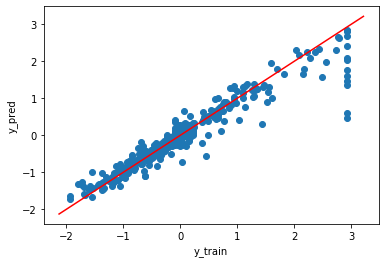

In [44]:
visualization_for_predict_data(y_train, y_pred, "y_train", "y_pred")

#### (5) 测试集的预测与可视化

In [45]:
y_pred = regr_svr_rbf.predict(X_test)

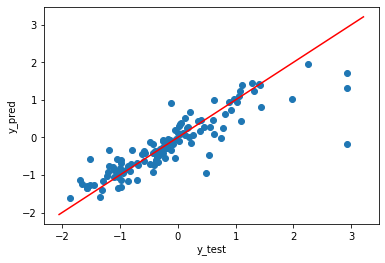

In [46]:
visualization_for_predict_data(y_test, y_pred, "y_test", "y_pred")

#### (6) 评价


- `rbf` 核类型具有良好的效果

### 17.5.6 将`极端随机森林`用于回归


- 回顾
    - 前面曾介绍过随机森林的分类方法 —— `Random Forest`
    - 回归分析也有类似随机森林的方法 —— `Extra-Trees` 或 `Extremely Randomized Trees`
    

- `Extra-Trees` 与 `Random Forest` 的异同
    - 前段过程相同
        - 创建对象
        - 训练模型
    - 预测过程有区别，到达末端树叶时
        - `Extra-Trees` —— 返回代表实数值
        - `Random Forest` —— 返回主分类

In [47]:
# 导入 ensemble
from sklearn import ensemble

#### (1) 极端树 (`ET, Extra-Trees`) 或 极端随机树 (`ERT, Extremely Randomized Trees`) 简介


- 调用语法
```python
>>> ensemble.ExtraTreesRegressor(n_estimators=10, criterion='mse', max_depth=None,
                                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=1,
                                 random_state=None, verbose=0, warm_start=False)
```


- 功能 —— 创建并返回极端随机树回归器(an extra-trees regressor)对象


- 参数
    - `n_estimators` —— 森林中树的数量，default=10
    - `criterion` —— 用于度量分裂质量的准则，default="mse" (mean squared error)
    - `random_state` —— 随机状态

#### (2) 创建 `ETR` 对象

In [48]:
regr_et = ensemble.ExtraTreesRegressor(n_estimators=10, random_state=33)

#### (3) 训练与评价

In [49]:
train_and_evaluate(regr_et, X_train, y_train)

在训练集上，决定系数： 1.0
使用 K-折交叉验证的 平均决定系数: 0.8325581589856377


#### (4) 训练集预测值可视化

In [50]:
y_pred = regr_et.predict(X_train)

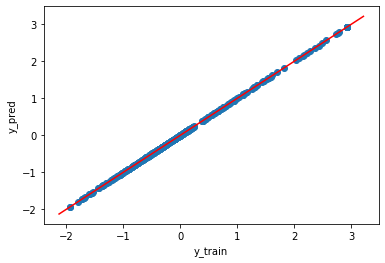

In [51]:
visualization_for_predict_data(y_train, y_pred, "y_train", "y_pred")

#### (5) 效果评价


- K-折平均分提高了一点
- 训练集上，决定系数得到 1，表现不错，仍要小心过拟合

#### (6) 随机森林极端树方法的边际效应


- 关心 `regr_et` 的属性
    - 特征重要性 —— `regr_et.feature_importances_`

In [52]:
regr_et.feature_importances_

array([0.01450924, 0.00497052, 0.01176786, 0.02613582, 0.02590561,
       0.37727303, 0.02065788, 0.03205316, 0.03001222, 0.02867425,
       0.06090727, 0.01415604, 0.3529771 ])

In [53]:
# 特征重要性
feature_importance = sorted(zip(regr_et.feature_importances_,  boston.feature_names), key=lambda x: x[0], reverse=True)

print(" 决定系数    特征\n" + "-"*20)
[print("{0:8.4f}     {1}".format(ft, importance)) for (ft, importance) in feature_importance];

 决定系数    特征
--------------------
  0.3773     RM
  0.3530     LSTAT
  0.0609     PTRATIO
  0.0321     DIS
  0.0300     RAD
  0.0287     TAX
  0.0261     CHAS
  0.0259     NOX
  0.0207     AGE
  0.0145     CRIM
  0.0142     B
  0.0118     INDUS
  0.0050     ZN


#### (7) 最重要的两个特征 —— 对房价影响最大


- `LSTAT` —— 地区低端人口占比% （% lower status of the population）
- `RM`  —— 每处住所的平均房间数（average number of rooms per dwelling）

### 17.6 评价测试集

### 17.6.1 定义性能测试函数 `measure_performance`

- 调用语法
```python
>>> measure_performance(X, y, regr)
```


- 参数
    - `X` 特征集
    - `y` 目标集
    - `regr` 回归器


- 功能 —— 性能测试，并选择性输出精度、分类报告、混淆矩阵、决定系数等结果

#### (1) 评分

In [54]:
from sklearn import metrics

def measure_performance(X, y, regr):
    y_pred=regr.predict(X)   
    print ("R2-决定系数:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n")

In [55]:
measure_performance(X_test, y_test, regr_et)

R2-决定系数:0.770 



#### (2) 可视化

In [56]:
y_pred=regr_et.predict(X_test)

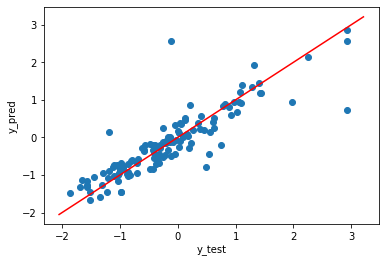

In [57]:
visualization_for_predict_data(y_test, y_pred, "y_test", "y_pred")

### 17.6.2 实测分析


- 测试集的决定系数不如 K-折，也不如训练集

### 第17讲 结束